<a href="https://colab.research.google.com/github/idrees-wakhatgarh-Git/Logistic-Regression/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(r'insurance.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

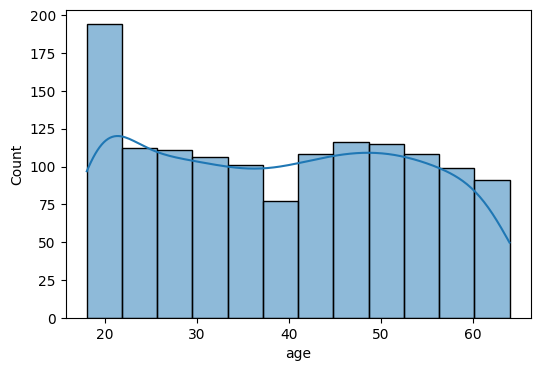

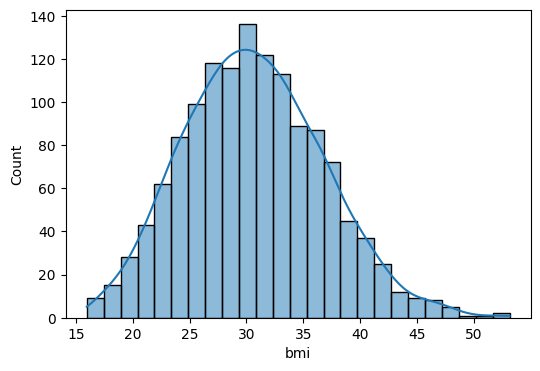

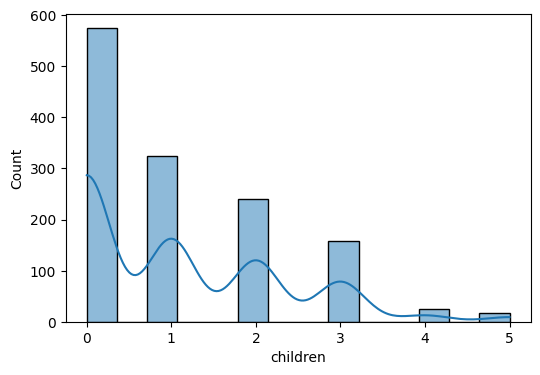

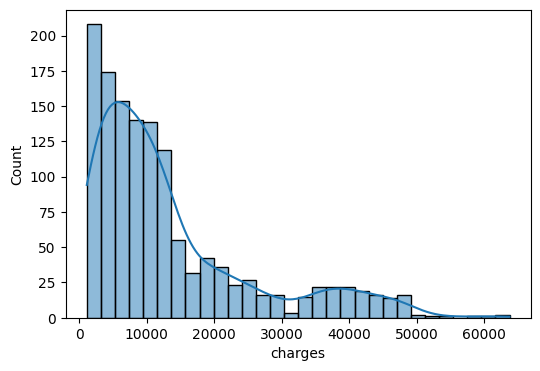

In [ ]:
num_columns = ['age', 'bmi', 'children', 'charges']
for col in num_columns:
  plt.figure(figsize=(6,4))
  sns.histplot(df[col],kde=True)

<Axes: xlabel='children', ylabel='count'>

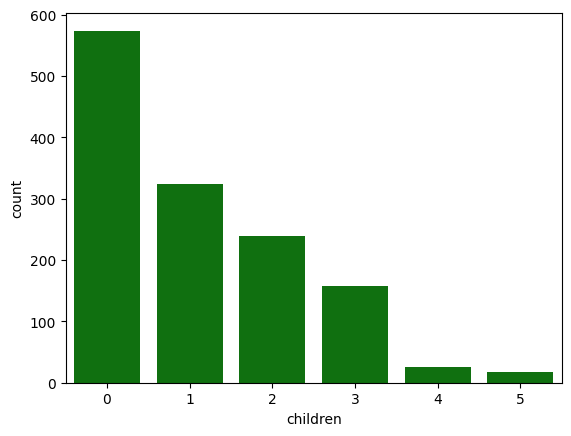

In [ ]:
sns.countplot(x = df['children'],color='green')

<Axes: xlabel='sex', ylabel='count'>

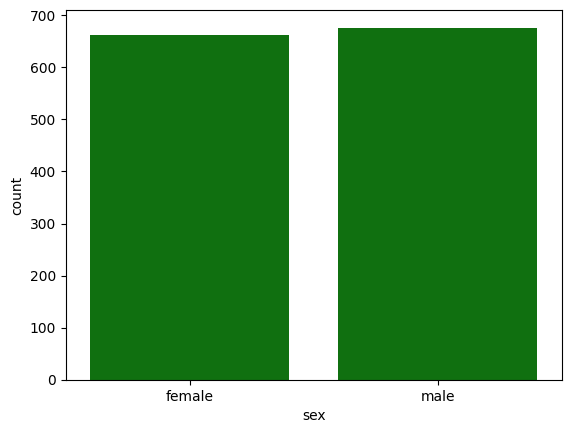

In [ ]:
sns.countplot(x = df['sex'],color='green')

<Axes: xlabel='smoker', ylabel='count'>

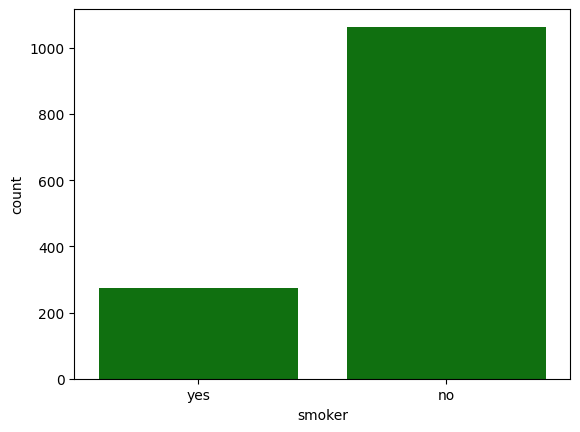

In [ ]:
sns.countplot(x = df['smoker'],color='green')

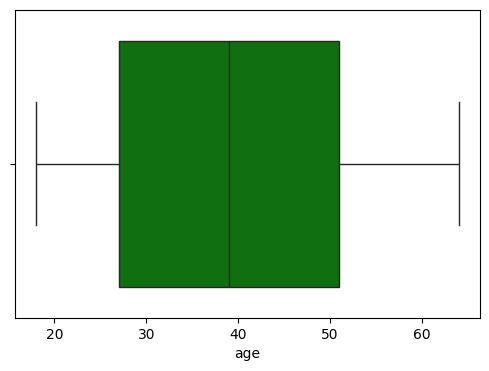

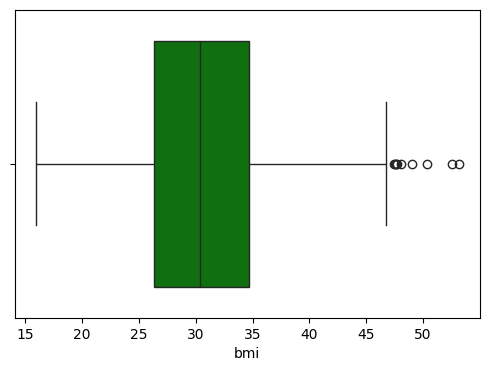

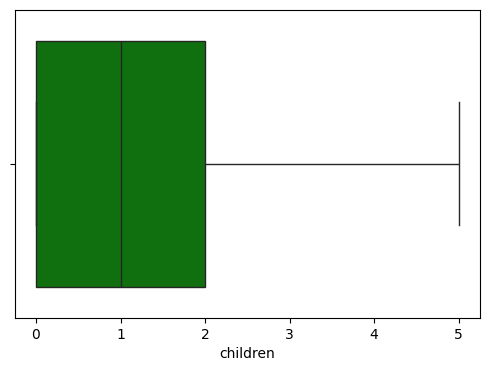

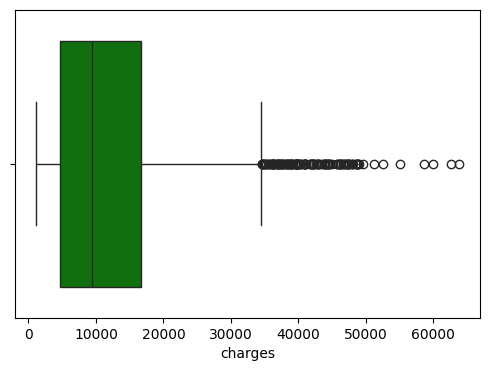

In [ ]:
for col in num_columns:
  plt.figure(figsize=(6,4))
  sns.boxplot(x = df[col],color='green')

<Axes: >

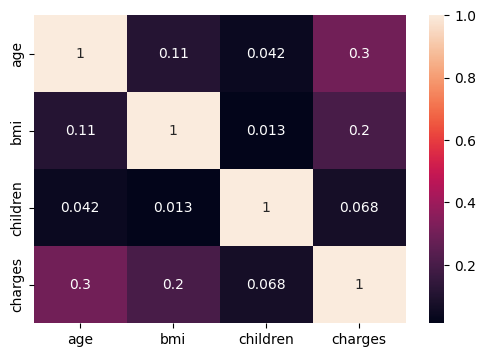

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [ ]:
df_clean = df.copy()

In [ ]:
df_clean.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df_clean.shape

(1338, 7)

In [ ]:
df_clean.drop_duplicates(inplace=True)

In [ ]:
df_clean.shape

(1337, 7)

In [ ]:
df_clean.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df_clean.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [ ]:
df_clean['sex'].value_counts()

,count
sex,
male,675
female,662


In [ ]:
# Label encoding
df_clean['sex'] = df_clean['sex'].map({'male':1,'female':0})

In [ ]:
df_clean.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [ ]:
df_clean['smoker'].value_counts()

,count
smoker,
no,1063
yes,274


In [ ]:
df_clean['smoker'] = df_clean['smoker'].map({'yes':1,'no':0})

In [ ]:
df_clean

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [ ]:
df_clean.rename(columns={'sex':'is_male','smoker':'is_smoker'},inplace=True)

In [ ]:
df_clean

,age,is_male,bmi,children,is_smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [ ]:
df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [ ]:
df['region'].duplicated().sum()

np.int64(1334)

In [ ]:
df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [ ]:
# One-hot encoding
df_clean = pd.get_dummies(df_clean,columns = ['region'],drop_first=True)

In [ ]:
df_clean.head()

,age,is_male,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


In [ ]:
df_clean = df_clean.astype(int)

In [ ]:
df_clean

,age,is_male,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27,0,1,16884,0,0,1
1,18,1,33,1,0,1725,0,1,0
2,28,1,33,3,0,4449,0,1,0
3,33,1,22,0,0,21984,1,0,0
4,32,1,28,0,0,3866,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30,3,0,10600,1,0,0
1334,18,0,31,0,0,2205,0,0,0
1335,18,0,36,0,0,1629,0,1,0
1336,21,0,25,0,0,2007,0,0,1


<Axes: xlabel='bmi', ylabel='Count'>

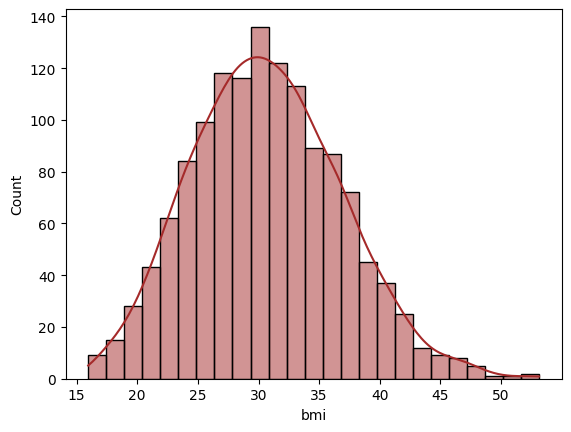

In [ ]:
sns.histplot(df['bmi'],kde=True,color='brown')

In [ ]:
df_clean['bmi_category'] = pd.cut(
    df_clean['bmi'],
    bins = [0, 18.5, 24.9, 29.9, float('inf')],
    labels = ['Underweight','Normal','Overweight','Obese']
)

In [ ]:
df_clean

,age,is_male,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,0,27,0,1,16884,0,0,1,Overweight
1,18,1,33,1,0,1725,0,1,0,Obese
2,28,1,33,3,0,4449,0,1,0,Obese
3,33,1,22,0,0,21984,1,0,0,Normal
4,32,1,28,0,0,3866,1,0,0,Overweight
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30,3,0,10600,1,0,0,Obese
1334,18,0,31,0,0,2205,0,0,0,Obese
1335,18,0,36,0,0,1629,0,1,0,Obese
1336,21,0,25,0,0,2007,0,0,1,Overweight


In [ ]:
df_clean = pd.get_dummies(df_clean,columns=['bmi_category'],drop_first=True)

In [ ]:
df_clean

,age,is_male,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,0,27,0,1,16884,0,0,1,False,True,False
1,18,1,33,1,0,1725,0,1,0,False,False,True
2,28,1,33,3,0,4449,0,1,0,False,False,True
3,33,1,22,0,0,21984,1,0,0,True,False,False
4,32,1,28,0,0,3866,1,0,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30,3,0,10600,1,0,0,False,False,True
1334,18,0,31,0,0,2205,0,0,0,False,False,True
1335,18,0,36,0,0,1629,0,1,0,False,False,True
1336,21,0,25,0,0,2007,0,0,1,False,True,False


In [ ]:
df_clean = df_clean.astype(int)

In [ ]:
df_clean.head()

,age,is_male,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,0,27,0,1,16884,0,0,1,0,1,0
1,18,1,33,1,0,1725,0,1,0,0,0,1
2,28,1,33,3,0,4449,0,1,0,0,0,1
3,33,1,22,0,0,21984,1,0,0,1,0,0
4,32,1,28,0,0,3866,1,0,0,0,1,0


In [ ]:
df_clean.columns

Index(['age', 'is_male', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
cols = ['age','bmi','children']
scaler = StandardScaler()

df_clean[cols] = scaler.fit_transform(df_clean[cols])

In [ ]:
df_clean.head()

,age,is_male,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,-1.440418,0,-0.517949,-0.909234,1,16884,0,0,1,0,1,0
1,-1.511647,1,0.462463,-0.079442,0,1725,0,1,0,0,0,1
2,-0.799350,1,0.462463,1.580143,0,4449,0,1,0,0,0,1
3,-0.443201,1,-1.334960,-0.909234,0,21984,1,0,0,1,0,0
4,-0.514431,1,-0.354547,-0.909234,0,3866,1,0,0,0,1,0


In [ ]:
from scipy.stats import pearsonr

selected_features = [
    'age','bmi','children','is_male','is_smoker','region_northwest',
    'region_southwest','region_southeast','bmi_category_Normal',
    'bmi_category_Overweight','bmi_category_Obese'

]

correlations = {
    feature: pearsonr(df_clean[feature],df_clean['charges'])[0]
    for feature in selected_features
}

correlations_df = pd.DataFrame(list(correlations.items()),columns=['Feature','Pearson Correlation'])
correlations_df.sort_values(by='Pearson Correlation', ascending=False)

NameError: name 'df_clean' is not defined

In [ ]:
category_features = [
    'is_male','is_smoker','region_northwest','region_southwest','region_southeast',
    'bmi_category_Normal','bmi_category_Overweight','bmi_category_Obese'
]

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
alpha = .05

df_clean['charges_bin'] = pd.qcut(df_clean['charges'], q=4, labels=False)
chi2_results = {}

for col in category_features:
  contingency = pd.crosstab(df_clean[col],df_clean['charges_bin'])
  chi2_stat, p_val, _, _ = chi2_contingency(contingency)
  decision = 'Reject Null (keep Feature)' if p_val < alpha else 'Accept Null (Drop Feature)'
  chi2_results[col] = {
      'chi2_statistic': chi2_stat,
      'p_value': p_val,
      'Decision': decision
  }

  chi2_df = pd.DataFrame(chi2_results).T
  chi2_df = chi2_df.sort_values(by='p_value')


In [ ]:
  chi2_df

,chi2_statistic,p_value,Decision
is_smoker,848.219178,0.0,Reject Null (keep Feature)
region_southeast,15.998167,0.001135,Reject Null (keep Feature)
is_male,10.258784,0.01649,Reject Null (keep Feature)
bmi_category_Obese,8.515711,0.036473,Reject Null (keep Feature)
region_southwest,5.091893,0.165191,Accept Null (Drop Feature)
bmi_category_Overweight,4.25149,0.235557,Accept Null (Drop Feature)
bmi_category_Normal,3.708088,0.29476,Accept Null (Drop Feature)
region_northwest,1.13424,0.768815,Accept Null (Drop Feature)


In [ ]:
df_final = df_clean[['age','is_male','bmi','children','is_smoker','charges','region_southeast','bmi_category_Obese']]

In [ ]:
df_final

,age,is_male,bmi,children,is_smoker,charges,region_southeast,bmi_category_Obese
0,-1.440418,0,-0.517949,-0.909234,1,16884,0,0
1,-1.511647,1,0.462463,-0.079442,0,1725,1,1
2,-0.799350,1,0.462463,1.580143,0,4449,1,1
3,-0.443201,1,-1.334960,-0.909234,0,21984,0,0
4,-0.514431,1,-0.354547,-0.909234,0,3866,0,0
...,...,...,...,...,...,...,...,...
1333,0.767704,1,-0.027743,1.580143,0,10600,0,1
1334,-1.511647,0,0.135659,-0.909234,0,2205,0,1
1335,-1.511647,0,0.952670,-0.909234,0,1629,1,1
1336,-1.297958,0,-0.844753,-0.909234,0,2007,0,0


In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X = df_final.drop('charges',axis=1)
y = df_final['charges']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test,y_pred)
r2

0.8040712413347119

In [ ]:
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2 = 1-((1-r2)*(n-1)/(n-p-1))
adjusted_r2

0.7987962362937233

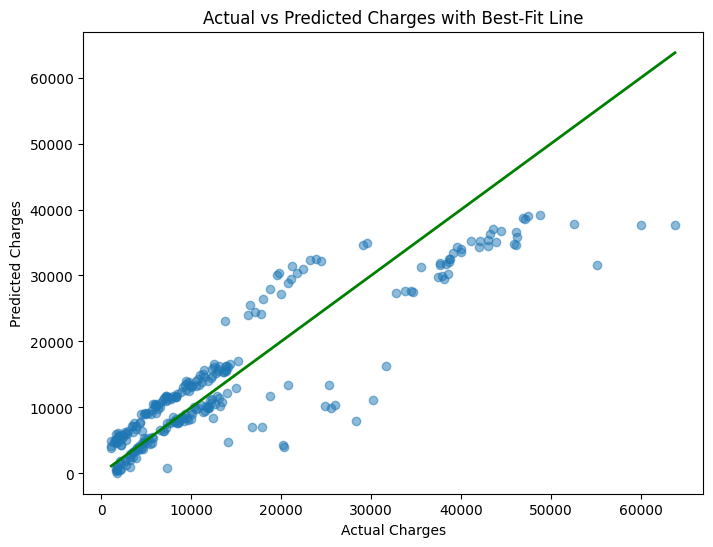

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'g-', lw=2) # Add best-fit line
plt.ylabel("Predicted Charges")
plt.xlabel("Actual Charges")
plt.title("Actual vs Predicted Charges with Best-Fit Line")
plt.show()